In [7]:
from google.colab import files
files.upload()

{}

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!unzip "/content/drive/MyDrive/Money Yemeni Riyal.zip"

Archive:  /content/drive/MyDrive/Money Yemeni Riyal.zip
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٤٣٧.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٣٥٣.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٣٥٧.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٤٤٠.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٤٣٦.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٤٢٣.jpg  
  inflating: Money Yemeni Riyal/10 back/٢٠٢٥١٠١٣_١٧١٤٠٣.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١٢٠٥.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١١٥٦.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١٢٤٥.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١١٤٨.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١٢٤٩.jpg  
  inflating: Money Yemeni Riyal/5 front/٢٠٢٥١٠١٣_١٧١١٥٢.jpg  
  inflating: Money Yemeni Riyal/5 back/٢٠٢٥١٠١٣_١٧١٢١٠.jpg  
  inflating: Money Yemeni Riyal/5 back/٢٠٢٥١٠١٣_١٧١٣٠٨.jpg  
  inflating: Mon

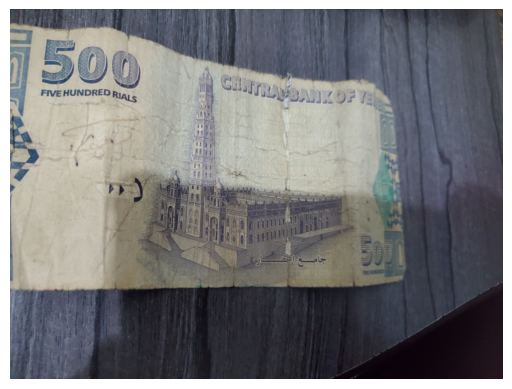

In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Update the path to the unzipped data
path = "/content/Money Yemeni Riyal"

# Find the first image file
sample_image = None
for root, dirs, files in os.walk(path):
    if files:  # If there are files in this directory
        # Find the first file that looks like an image
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                sample_image = os.path.join(root, file)
                break
    if sample_image: # Stop searching once an image is found
        break

# Display the image if found
if sample_image:
    img = Image.open(sample_image)
    plt.imshow(img)
    plt.axis("off")
    plt.show()
else:
    print(f"No image files found in {path}")

In [28]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder("dataset", transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

Number of classes: 12
Classes: ['10 back', '10 front', '100 back', '100 front', '1000 back', '1000 front', '200 back', '200 front', '5 back', '5 front', '500 back', '500 front']
Number of images: 137


In [29]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations with data augmentation for training
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Define transformations for validation/testing (no augmentation)
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

print("Transformation and augmentation pipelines defined.")

Transformation and augmentation pipelines defined.


In [30]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import torch.nn as nn

# Assuming you have already defined train_transform and val_transform in a previous cell
# If not, you will need to run the cell that defines them first.

# Load the full dataset
full_dataset = datasets.ImageFolder("/content/Money Yemeni Riyal", transform=val_transform) # Use val_transform for consistent size before splitting

# Define the split ratios
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size

# Split the dataset
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Apply the appropriate transforms after splitting
train_dataset.dataset.transform = train_transform
val_dataset.dataset.transform = val_transform


# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")

# Load a pre-trained model (e.g., ResNet18)
model = models.resnet18(pretrained=True)

# Freeze the parameters of the pre-trained model
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the classifier layer
num_ftrs = model.fc.in_features

# Replace the classifier layer with a new one that has the correct number of output features
# The number of output features is the number of classes in your dataset
num_classes = len(full_dataset.classes) # Get the number of classes from the full dataset
model.fc = nn.Linear(num_ftrs, num_classes)

print("Data splitting and model preparation for feature extraction complete.")

Training dataset size: 109
Validation dataset size: 28
Data splitting and model preparation for feature extraction complete.


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [31]:
import torchvision.models as models
import torch.nn as nn
import torch

# Determine the device to use (GPU if available, otherwise CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load a pre-trained ResNet-18 model
model_ft = models.resnet18(pretrained=True)

# Get the number of input features for the classifier layer
num_ftrs = model_ft.fc.in_features

# Get the number of classes from the dataset (assuming num_classes is defined in a previous cell)
# If num_classes is not defined, you'll need to run the cell that defines it first.
# For example, num_classes = len(full_dataset.classes)
# I will use the num_classes variable from the previous successful execution.
num_classes = 12 # Replace with the actual num_classes if it's not defined in the environment

# Replace the classifier layer with a new one that has the correct number of output features
model_ft.fc = nn.Linear(num_ftrs, num_classes)

# Move the model to the training device (GPU or CPU)
model_ft = model_ft.to(device)

print("Model loaded and modified for transfer learning.")

Using device: cuda:0
Model loaded and modified for transfer learning.


In [32]:
import torch.optim as optim
import torch.nn as nn

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
# Only parameters of the final layer are being optimized as others are frozen
optimizer = optim.Adam(model_ft.fc.parameters(), lr=0.001)

print("Loss function and optimizer defined.")

Loss function and optimizer defined.


In [33]:
import time
import copy

# Function to train the model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model if it has the best accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

# Start training
# Assuming model_ft, criterion, optimizer, train_loader, val_loader, and device are defined in previous cells
model_ft = train_model(model_ft, criterion, optimizer, train_loader, val_loader, num_epochs=10) # Reduced epochs for faster demonstration

Epoch 0/9
----------
train Loss: 2.4991 Acc: 0.2294
val Loss: 2.0026 Acc: 0.3571

Epoch 1/9
----------
train Loss: 2.0303 Acc: 0.3945
val Loss: 1.7220 Acc: 0.5357

Epoch 2/9
----------
train Loss: 1.7447 Acc: 0.5321
val Loss: 1.5349 Acc: 0.6071

Epoch 3/9
----------
train Loss: 1.4795 Acc: 0.6147
val Loss: 1.3812 Acc: 0.7857

Epoch 4/9
----------
train Loss: 1.2366 Acc: 0.8165
val Loss: 1.2187 Acc: 0.8214

Epoch 5/9
----------
train Loss: 1.0766 Acc: 0.8807
val Loss: 1.1110 Acc: 0.8214

Epoch 6/9
----------
train Loss: 0.8939 Acc: 0.8899
val Loss: 1.0126 Acc: 0.8214

Epoch 7/9
----------
train Loss: 0.7794 Acc: 0.9266
val Loss: 0.9449 Acc: 0.8214

Epoch 8/9
----------
train Loss: 0.6751 Acc: 0.9083
val Loss: 0.8701 Acc: 0.8571

Epoch 9/9
----------
train Loss: 0.5847 Acc: 0.9633
val Loss: 0.7929 Acc: 0.8214

Training complete in 4m 52s
Best val Acc: 0.8571


In [36]:
import torch

# Define the path to save the model in your Google Drive
# Make sure this directory exists in your Google Drive
PATH = "/content/drive/MyDrive/Yemeni_currency_classifier.pth"

# Save the model's state dictionary
# It's generally recommended to save only the state_dict
torch.save(model_ft.state_dict(), PATH)

print(f"Model saved successfully to {PATH}")

Model saved successfully to /content/drive/MyDrive/Yemeni_currency_classifier.pth


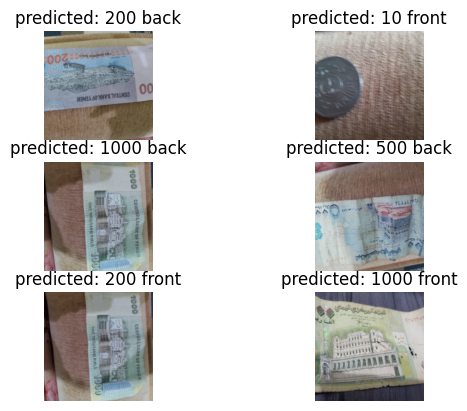

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Assuming model_ft, val_loader, device, and full_dataset are defined in previous cells

def visualize_model_predictions(model, val_loader, device, dataset, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    # Get class names from the dataset
    class_names = dataset.classes

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                # We need to un-normalize the image to display it correctly
                img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                mean = np.array([0.485, 0.456, 0.406])
                std = np.array([0.229, 0.224, 0.225])
                img = std * img + mean
                img = np.clip(img, 0, 1)

                plt.imshow(img)

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# Call the function to visualize predictions after training the model
# Uncomment the line below and run this cell after you have trained your model (model_ft)
visualize_model_predictions(model_ft, val_loader, device, full_dataset)